In [37]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


In [109]:
# Sellmeier equation for different materials to find index of refraction at varied wave-length. 
# I couldn't find the Sellmeier Formula for UVFS specifically, so presented here is the formula 
# for regular fused sillica. Would be happy to update if given the proper formula. 
def n_2(wavelength, material):
    if material == 'MgF2':
        n_sqr = (1 
               + 0.48755108*wavelength**2/(wavelength**2-0.04338408**2) 
               + 0.39875031*wavelength**2/(wavelength**2-0.09461442**2) 
               + 2.3120353*wavelength**2/(wavelength**2-23.793604**2) )
        
    elif material == 'CaF2':
        n_sqr = (1 
               + 0.33973 
               + 0.69913*wavelength**2/(wavelength**2-0.09374**2) 
               + 0.11994*wavelength**2/(wavelength**2-21.18**2) 
               + 4.35181*wavelength**2/(wavelength**2-38.46**2) )
        
    elif material == 'UVFS':
        n_sqr = (1 
               + 0.6961663*wavelength**2/(wavelength**2-0.0684043**2) 
               + 0.4079426*wavelength**2/(wavelength**2-0.1162414**2) 
               + 2.8974794*wavelength**2/(wavelength**2-9.896161**2) )

    return n_sqr


# Lens Makers Equation for finding focal length at varied refractive index. roc1 and roc2
# are the respective radii of curvature for each face of the lens. roc2 is infinite for a 
# plano-convex or plano-concave lens.
def f(in_ref, roc1, roc2):
    f_inv = (in_ref - 1)*(1/roc1 + 1/roc2)
    return (1/f_inv)


# Thin Lens equation to find image distance for a given focal length and object distance
def d_i(focal_length, object_distance):
    image_distance_inv = (1/focal_length-1/object_distance)
    image_distance = 1/image_distance_inv
    return image_distance


# Equation for numerical aperture. Not in use currently. n here is not n_MgF2, 
# but of the medium of propagation. Theta is the angle between the edge of the 
# lens and the point of light production measured from the z-axis.
def NA(in_ref, angle):
    NA = in_ref*np.sin(angle)
    return NA

In [110]:
# Constants

wl_range = np.arange(0.1, 0.501, 0.001) # Wavelengths in um (Sellmeier equation uses um usually)
wl_range_nm = wl_range*1000 # Converts wavelength into nm, more intuitive for me.

wl_poi = [0.172, 0.365, 0.425] # Specific Wavelengths you want to see the values for in the plots.
wl_poi_nm = np.asarray(wl_poi)*1000  # Converts specific wavelengths into nm again.

mat = 'MgF2' # Materials include: MgF2, CaF2, UVFS as of now.

R_1 = 28.3 # First Radius of Curvature of the lens in mm
R_2 = np.inf # Second Radius of Curvature of the lens in mm. Infinite if lens has a planar face.

d_o = 349 # Distance from EL region to lens in mm (if you don't know this yet, 
          # you can scroll down to the bottom two cells and work it out there)

In [111]:
# Takes a list of wavelengths and calculates for each the refractive index of MgF2, 
# focal length of a 28.3mm ROC lens, the needed distance between the lens and II, 
# and the magnification .


# Calculates the refractive index over the given range of wavelengths for the chosen material.
n_range = []
for wl in wl_range:
    n_range.append(np.sqrt(n_2(wl, mat)))
    
# Calculates the focal length in mm
f_range = []
for n in n_range:
    f_range.append(f(n, R_1, R_2))
    

# Calculates the distance in mm between lens and II for a fixed object distance, varied wavelength
d_i_range = []
for foc in f_range:
    d_i_range.append(d_i(foc, d_o))
    
# Calculates magnification factor of the lens
M_range = []    
for d in d_i_range:
    M_range.append(-d/d_o)
    


In [112]:
# Establishes the values for specific wavelengths of interest in the system, later
# to be plotted and labeled on the curve. All the calculations are the same as the previous cell.

n_poi = []
for wl in wl_poi:
    n_poi.append(np.sqrt(n_2(wl, material)))
    
f_poi = []
for n in n_poi:
    f_poi.append(f(n, R_1, R_2))

d_i_poi = []
d_o = 349
for foc in f_poi:
    d_i_poi.append(d_i(foc, d_o))
    
M_poi = []    
for d in d_i_poi:
    M_poi.append(-d/d_o)
    


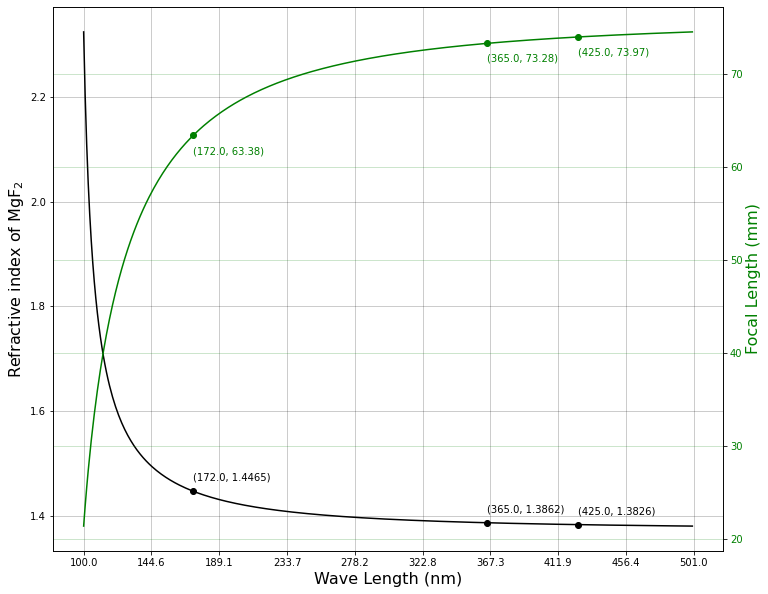

In [131]:
# Plots the Refractive index and the Focal length of the given lens as a function of the given wavelength range, 
# along with the values for any specified wavelengths in wl_poi.

fig, ax1 = plt.subplots(figsize = (12, 10)) 
fig.set_facecolor('white')
  
# Refractive Index
ax1.set_xlabel(r'Wave Length (nm)', fontsize=16) 
ax1.set_ylabel(r'Refractive index of MgF$_2$', color = 'black', fontsize=16) 
plot_1 = ax1.plot(wl_range_nm, n_range, color = 'black') 
scatter_1 = ax1.scatter(wl_poi_nm, n_poi, color = 'black')
ax1.tick_params(axis ='y', labelcolor = 'black') 
plt.grid(color='black', alpha = 0.25)

for i, j in zip(wl_poi_nm, n_poi):
    ax1.annotate((np.round(i, 4),np.round(j, 4)), (i, j), (i, j+0.02))

# Adding Twin Axes

ax2 = ax1.twinx() 
  
# Focal Length
ax2.set_ylabel('Focal Length (mm)', color = 'green', fontsize=16) 
plot_2 = ax2.plot(wl_range_nm, f_range, color = 'green') 
scatter_2 = ax2.scatter(wl_poi_nm, f_poi, color = 'green')
ax2.tick_params(axis ='y', labelcolor = 'green') 
plt.grid(color ='green', alpha = 0.25)

for i, j in zip(wl_poi_nm, f_poi):
    ax2.annotate((np.round(i, 2),np.round(j, 2)), (i, j), (i, j-2), color = 'g')

plt.xticks(np.linspace(min(wl_range_nm), max(wl_range_nm)+1, 10))
# plt.title(r'Change in MgF$_2$ Refractive Index and Focal Length (r.o.c. = 28.3mm) w/ Wavelength', fontsize=16)
# plt.savefig('n&fl_vs_wl.png', dpi = 300)
plt.show()

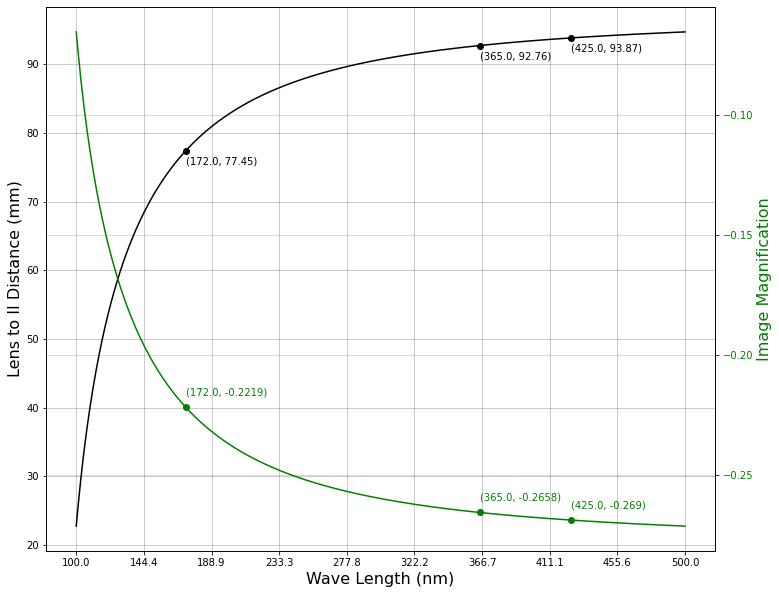

In [133]:
# Plots the required distance between the Lens and the II and the magnfication at said distance as a 
# function of the given wavelength range, along with the values for any specified wavelengths in wl_poi.


fig, ax1 = plt.subplots(figsize = (12, 10))
fig.set_facecolor('white')

# Image Distance
ax1.set_xlabel(r'Wave Length (nm)', fontsize=16) 
ax1.set_ylabel(r'Lens to II Distance (mm)', color = 'black', fontsize=16) 
plot_1 = ax1.plot(wl_range_nm, d_i_range, color = 'black') 
scatter_1 = ax1.scatter(wl_poi_nm, d_i_poi, color = 'black')
ax1.tick_params(axis ='y', labelcolor = 'black') 
plt.grid(color='black', alpha = 0.25)

for i, j in zip(wl_poi_nm, d_i_poi):
    ax1.annotate((np.round(i, 2),np.round(j, 2)), (i, j), (i, j-2))



ax2 = ax1.twinx() 
  
# Magnification
ax2.set_ylabel('Image Magnification', color = 'green', fontsize=16) 
plot_2 = ax2.plot(wl_range_nm, M_range, color = 'green') 
scatter_2 = ax2.scatter(wl_poi_nm, M_poi, color = 'green')
ax2.tick_params(axis ='y', labelcolor = 'green') 
plt.grid(color ='green', alpha = 0.25)

for i, j in zip(wl_poi_nm, M_poi):
    ax2.annotate((np.round(i, 4),np.round(j, 4)), (i, j), (i, j+0.005), color = 'g')

plt.xticks(np.linspace(min(wl_range_nm), max(wl_range_nm), 10))

# plt.savefig('IIpos&Mag_vs_wl.png', dpi = 300)
plt.show()

In [134]:
# Calculates the image distance in mm for a fixed focal length, varied object distance. Useful for finding 
# these distances given a set of constraining factors (Vessel Length, II region length, etc.)

wl = 0.172 # Specific Wavelength you want to see the values for in the plots.
n = (np.sqrt(n_2(wl, material))) # Lens's index of refraction at that wavelength 
focal_length = (f(n, R_1, R_2)) # Lens's focal length at that wavelength



d_o_rangefinder = np.arange(200,1001, 1) # Range of object distances in mm
d_i_rangefinder = []

for d_o in d_o_rangefinder:
    d_i_rangefinder.append(d_i(focal_length, d_o))
    
M_rangefinder = []
for i in range(0,len(d_o_rangefinder)):
    M_rangefinder.append(-d_i_rangefinder[i]/d_o_rangefinder[i])

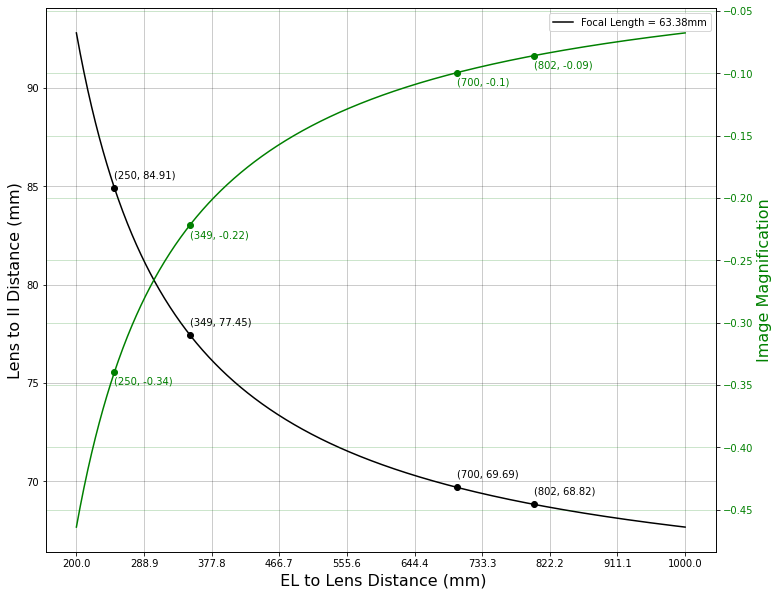

In [143]:
# Plots the required distance between the Lens and the II as a 
# function of the object distance given a fixed focal length 
# calculated from the wavelengths of interest. Includes Magnification.


# If you see an object distance that looks promising or have an idea of what it should be, you can plug 
# it in here to find the corresponding image distance and magnification exactly.

specific_d_o = [349, 250, 700, 802] # In units of mm, only as many decimals as given in the previous cell.
specific_d_i = []
specific_M = []
for o in specific_d_o:
    specific_d_i.append(d_i_rangefinder[int(np.where(d_o_rangefinder == o)[0])])
    specific_M.append(M_rangefinder[int(np.where(d_o_rangefinder == o)[0])])

# Image Distance
fig, ax1 = plt.subplots(figsize = (12, 10))
fig.set_facecolor('white')
  
ax1.set_xlabel(r' EL to Lens Distance (mm)', fontsize=16) 
ax1.set_ylabel(r'Lens to II Distance (mm)', color = 'black', fontsize=16) 
plot_1 = ax1.plot(d_o_rangefinder, d_i_rangefinder, color = 'k',
                  label = ('Focal Length = ' + str(np.round(focal_length, 2)) + 'mm')) 

scatter_1 = ax1.scatter(specific_d_o, specific_d_i, color = 'black')
ax1.tick_params(axis ='y', labelcolor = 'black')
ax1.legend()
plt.grid(color='black', alpha = 0.25)

for o, i in zip(specific_d_o, specific_d_i):
    ax1.annotate((np.round(o, 2),np.round(i, 2)), #Value to print 
                 (o, i), #Spot to point at
                 (o, i + 0.5)) #Location where the text sits


# Magnification
ax2 = ax1.twinx() 
  
ax2.set_ylabel('Image Magnification', color = 'green', fontsize=16) 
plot_2 = ax2.plot(d_o_rangefinder, M_rangefinder, color = 'green') 
scatter_2 = ax2.scatter(specific_d_o, specific_M, color = 'green')
ax2.tick_params(axis ='y', labelcolor = 'green') 
plt.grid(color ='green', alpha = 0.25)

for o, m in zip(specific_d_o, specific_M):
    ax2.annotate((np.round(o, 2),np.round(m, 2)), #Value to print 
                 (o, m), #Spot to point at
                 (o, m - 0.01), #Location where the text sits
                 color = 'g')

plt.xticks(np.linspace(min(d_o_rangefinder), max(d_o_rangefinder), 10))


plt.savefig('Di&Mag_Vs_Do.png', dpi = 300)
plt.show()

In [366]:
# # Plots the required distance between the Lens and the II as a 
# # function of the object distance given a fixed focal length 
# # calculated from the wavelengths of interest.

# plt.figure(figsize=(12,10))

# plt.plot(d_o_rangefinder, d_i_rangefinder, label = ('Focal Length = ' + str(np.round(f_V2, 2)) + 'mm'))
# plt.plot(d_o_rangefinder, M_rangefinder)

# specific_d_o = [349]
# specific_d_i = []# In units of mm, only as many decimals as given in the previous cell.
# for o in specific_d_o:
#     specific_d_i.append(d_i_rangefinder[int(np.where(d_o_rangefinder == specific_d_o)[0])])

# plt.scatter(specific_d_o, specific_d_i) # Plots the point

# for o, i in zip(specific_d_o, specific_d_i):
#     plt.annotate((np.round(o, 2),np.round(i, 2)), #Value to print 
#                  (o, i), #Spot to point at
#                  (o, i + 0.5)) #Location where the text sits


# plt.xlabel('Distance from EL to Lens (mm)', fontsize = 16)
# plt.ylabel('Distance from Lens to II (mm)', fontsize = 16)
# plt.legend()

# plt.show()

[-0.22192064559985283]
